In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import random
import scipy
from sklearn.metrics import pairwise_distances

In [104]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

#plt.style.use('dark_background')

In [105]:
def KLD_analysis(frequencies):
    '''rows are sessions (or mice/phases), columns are variables (syllables)'''
    cohort_dist=np.zeros((len(frequencies),len(frequencies)),dtype=float)
    x=0
    y=0
    for i in frequencies:
        for j in frequencies:
            i[i==0]=.0000000001
            j[j==0]=.0000000001
            cohort_dist[x,y]=scipy.stats.entropy(pk=np.array(i), qk=np.array(j))
            y=y+1
        y=0
        x=x+1
    #cohort_dist[cohort_dist==0]='nan'
    return cohort_dist

def plot_KLD(cohort_dist,age_labels,vmax=0.1,title='distance'):
    # cohort_dist is matrix of
    seqmatcolor='magma'
    cmg=sns.clustermap(cohort_dist,cmap=seqmatcolor,
                       xticklabels=1,
                       yticklabels=1,
                   colors_ratio=0.2,cbar_pos=(1.05, 0.045, 0.03, 0.75),
                   col_cluster=False,row_cluster=False,
                   method='average',metric='sqeuclidean', vmax=vmax)
    cmg.fig.set_size_inches(5,5)
    ax = cmg.ax_heatmap
    ax.set_xticklabels(age_labels, fontsize=6)
    ax.set_yticklabels(age_labels)
    #ax.set_yticks([])
    #ax.set_xticks([])
    ax.set_title(title,fontsize=14)
    plt.show()
    #cmg.savefig(data_loc +'long=kld_between_ages.pdf', bbox_inches='tight')

In [106]:
## upload data frame females
#path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/longtogeny_males_clean.parquet')
#path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/ontogeny_males_clean.parquet')
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_04/ontogeny_females_clean.parquet')

mdf = pd.read_parquet(path)

In [107]:
'''
## filter out bad days - 
bad_session=[221, 228]
#bad_syllable=[44,89]
bad_syllable=[44]
bad_mouse='04_01'
#temp = mdf.loc[~mdf.index.isin(list(bad))]
newdf= mdf.copy()
newdf.drop(bad_session, level=0, axis=0, inplace=True)
newdf.drop(bad_mouse, level=1, axis=0, inplace=True)
newdf.drop(bad_syllable, axis=1, inplace=True)
'''

"\n## filter out bad days - \nbad_session=[221, 228]\n#bad_syllable=[44,89]\nbad_syllable=[44]\nbad_mouse='04_01'\n#temp = mdf.loc[~mdf.index.isin(list(bad))]\nnewdf= mdf.copy()\nnewdf.drop(bad_session, level=0, axis=0, inplace=True)\nnewdf.drop(bad_mouse, level=1, axis=0, inplace=True)\nnewdf.drop(bad_syllable, axis=1, inplace=True)\n"

In [108]:
newdf= mdf.copy()

In [109]:
## kld calculations

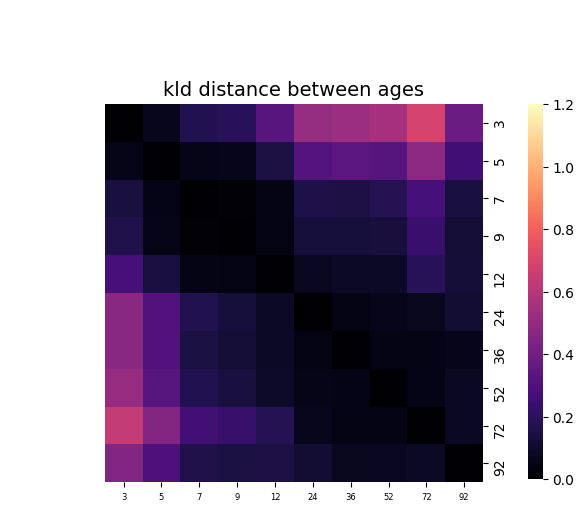

In [110]:
data=newdf.groupby('age').mean()
ages=data.index.get_level_values(0)
kld = KLD_analysis(data.to_numpy())
plot_KLD(kld,data.index.get_level_values(0),1.2,'kld distance between ages')
#fig.savefig(data_loc +'long=kld_between_ages.pdf', bbox_inches='tight')

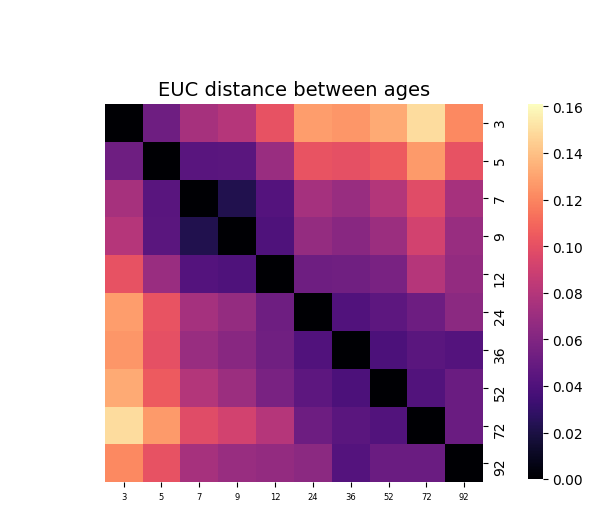

0.14917192742053217

In [111]:
utemp = pairwise_distances(data.to_numpy())
plot_KLD(utemp,data.index.get_level_values(0),0.161, 'EUC distance between ages')
np.max(utemp)

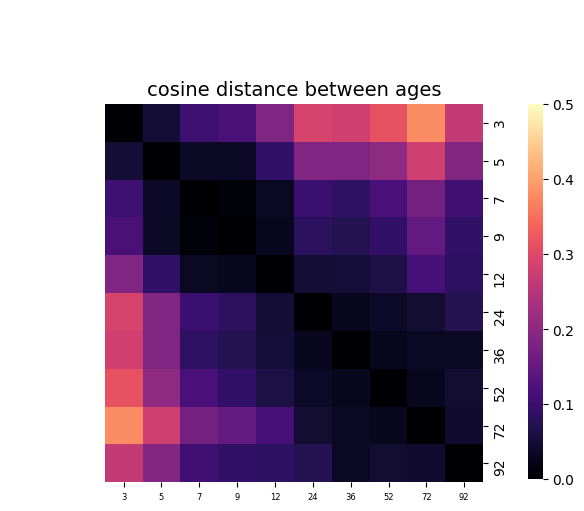

0.3800925777786417

In [112]:
ctemp = pairwise_distances(data.to_numpy(), metric = 'cosine')
plot_KLD(ctemp,data.index.get_level_values(0),0.5,'cosine distance between ages')
np.max(ctemp)

In [113]:
## correalte behavioral distance with age distance

In [114]:
ages = pairwise_distances(data.index.get_level_values(0).to_numpy().reshape(-1, 1))

In [115]:
ages = data.index.get_level_values(0).to_numpy()
days = (ages.reshape(len(ages),-1) - ages.reshape(-1,len(ages))).T 

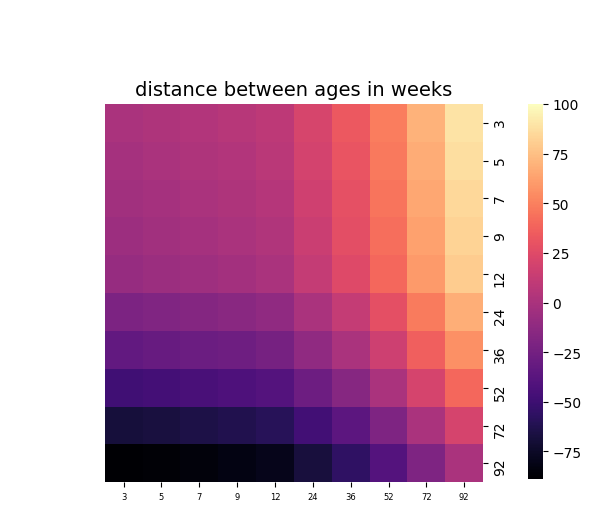

In [116]:
plot_KLD(days,ages,100,'distance between ages in weeks')

In [117]:
fages = days[np.triu_indices(np.shape(days)[0], k=1)].flatten()
fkld = kld[np.triu_indices(np.shape(kld)[0], k=1)].flatten()
feuc=utemp[np.triu_indices(np.shape(utemp)[0], k=1)].flatten()

Text(0, 0.5, 'behavioral distnace euclidean')

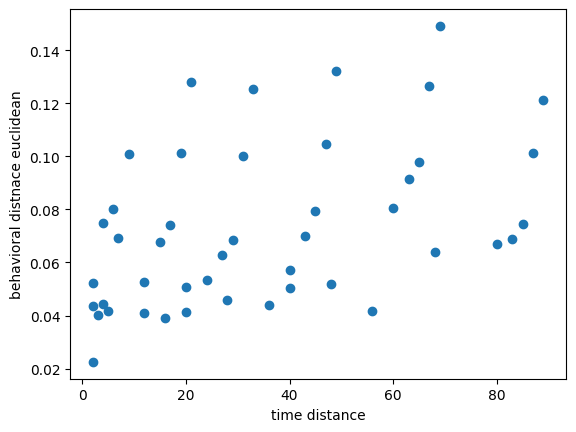

In [118]:
plt.scatter(fages,feuc)
plt.xlabel('time distance')
plt.ylabel('behavioral distnace euclidean')

Text(0, 0.5, 'behavioral distnace kld')

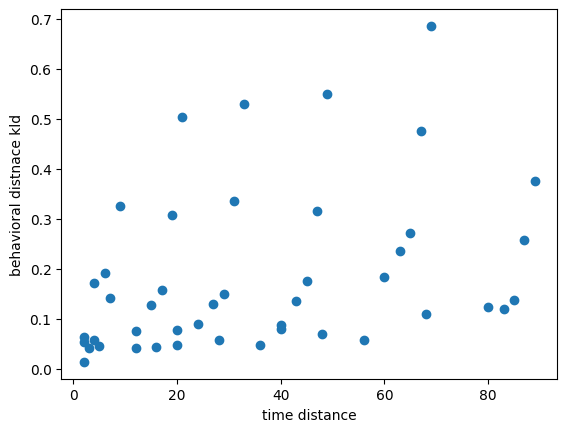

In [119]:
plt.scatter(fages,fkld)
plt.xlabel('time distance')
plt.ylabel('behavioral distnace kld')

In [102]:
## exploring distances in behavior per individual
data=newdf.groupby(['mouse','age']).mean()

KeyError: 'mouse'

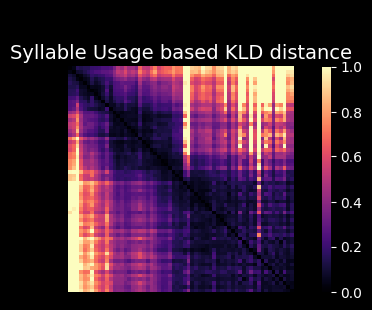

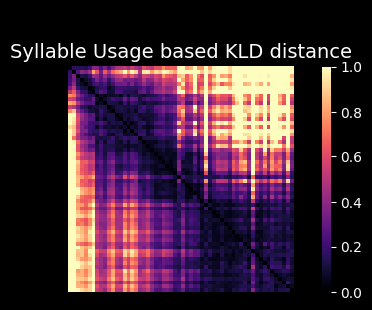

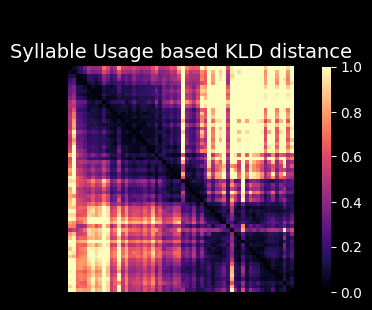

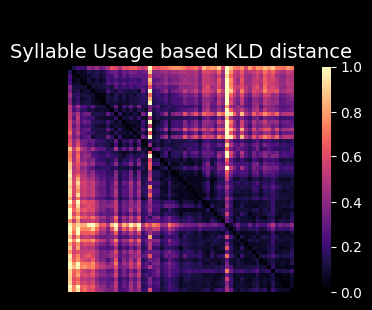

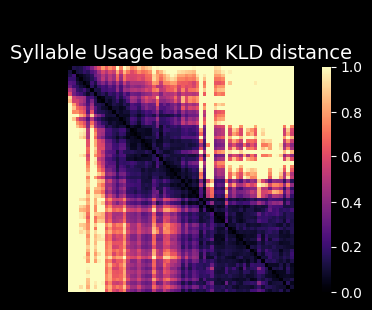

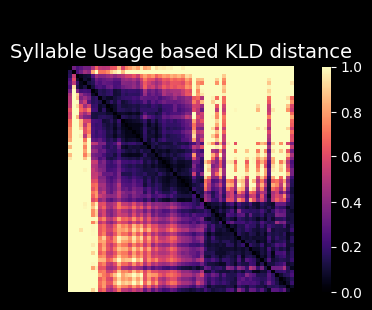

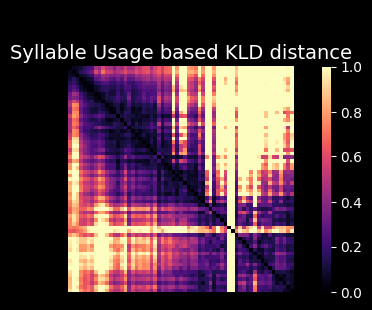

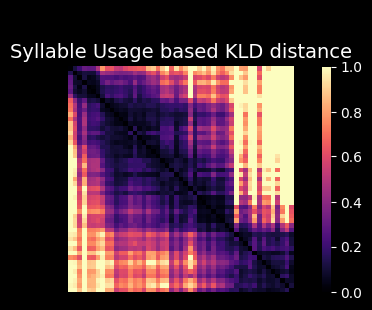

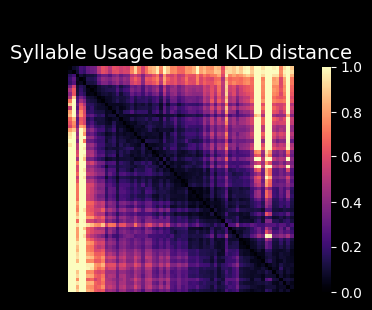

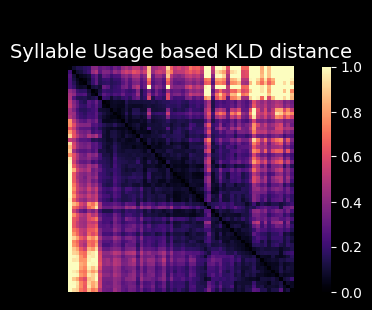

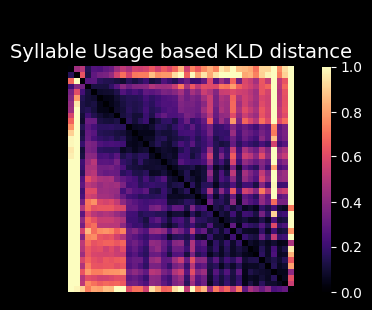

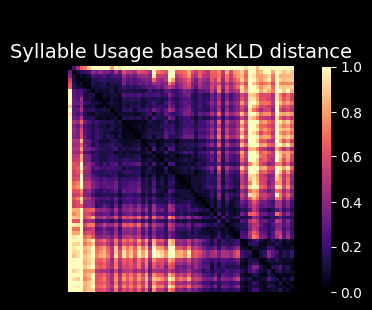

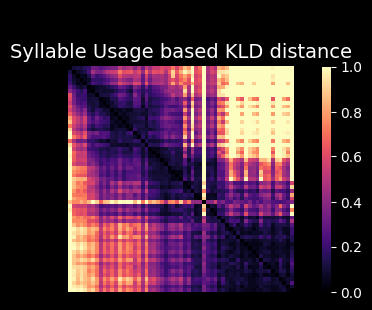

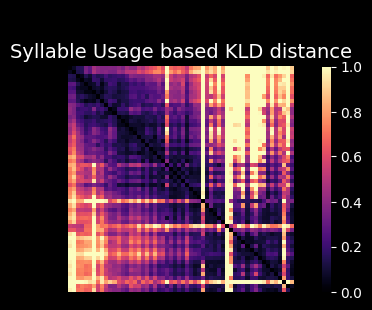

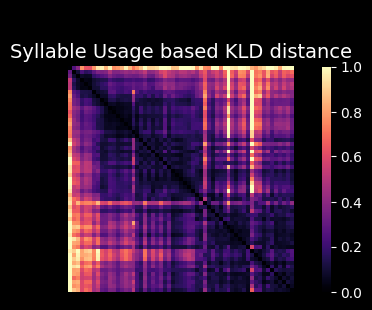

In [29]:
for i,_df in enumerate (data.groupby('mouse')):
    temp=_df[1].to_numpy()
    ages= _df[1].index.get_level_values(1)
    temp_kld = KLD_analysis(temp)
    plot_KLD(temp_kld,ages)
    

In [23]:
temp=_df[1].to_numpy()
temp

array([[0.04896014, 0.02079723, 0.00086655, ..., 0.0372617 , 0.0034662 ,
        0.00433276],
       [0.04292597, 0.01182654, 0.00131406, ..., 0.03416557, 0.00175208,
        0.00569426],
       [0.05687398, 0.01391162, 0.00040917, ..., 0.03641571, 0.00368249,
        0.00327332],
       ...,
       [0.03306524, 0.02368186, 0.03038427, ..., 0.04289544, 0.01876676,
        0.08489723],
       [0.03179056, 0.0341281 , 0.03740065, ..., 0.03366059, 0.02431043,
        0.05329593],
       [0.02026049, 0.03328509, 0.03521466, ..., 0.03714424, 0.02267246,
        0.06753497]])

In [ ]:
## exploring distances in behavior per individual
data=newdf.groupby(['mouse','age']).mean()
kld = KLD_analysis(data.to_numpy())
plot_KLD(kld,data.index.get_level_values(0),1.2)
#fig.savefig(data_loc +'long=kld_between_ages.pdf', bbox_inches='tight')